In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
words_frq = pd.read_csv("twitter_wordsbag.csv")
words_frq =  words_frq.drop(['Unnamed: 0'], axis = 1)
words_frq = words_frq.sort_values(by = ['frq'], ascending = False)

In [3]:
words_frq

,word,frq
2,get,127995
55,like,124031
24,go,101997
222,good,100722
77,got,89997
...,...,...
11344,brazier,0
11345,dauphin,0
11346,subclass,0
11347,toxin,0


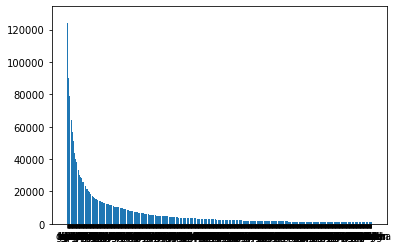

In [33]:
plt.bar(words_frq['word'][:1000], words_frq['frq'][:1000])
plt.show()

In [34]:
words_frq_2 = pd.read_csv("features freq final.csv")

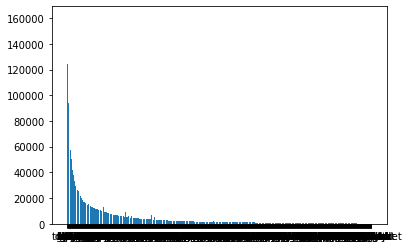

In [36]:
plt.bar(words_frq_2['word'][:], words_frq_2['frq'][:])
plt.show()

In [4]:
tw_ds_1_6M = pd.read_csv("Twitter_Training_1_6M.csv", encoding='latin-1')

In [5]:
 tw_ds_1_6M =tw_ds_1_6M.drop ([ '_TheSpecialOne_'] ,axis = 1)

In [6]:
tw_ds_1M = pd.read_csv("Twitter_Training_1_M.csv", encoding='latin-1')
tw_ds_1M

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
1048570,1048584,0,Missing my fiancee sooo badly!!! I love you b...
1048571,1048585,0,missing my friend
1048572,1048586,0,Missing my friend and my cousin. Two months pa...
1048573,1048587,0,missing my friends!


In [7]:
tw_ds_1M =tw_ds_1M.drop(['ItemID'], axis = 1)


In [15]:
tw_ds_1_6M = tw_ds_1_6M.drop ([ '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY'], axis =1)

In [16]:
tw_ds_1_6M.columns = ['label', 'tweet']
tw_ds_1M.columns = ['label', 'tweet']

In [17]:
tw_ds_1_6M["label"]=tw_ds_1_6M["label"].replace(4,1)

In [18]:
tw_fullset = pd.concat ([tw_ds_1_6M, tw_ds_1M])

In [20]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [27]:
tw_set_array_of_words = []

for idx, tw in enumerate(tw_fullset["tweet"]):
    tw_set_array_of_words.append(tknzr.tokenize(tw))
    

In [85]:
tw_set_array_of_words
list(filter(lambda x:x[0]!='@', Uwords))

[['is',
  'upset',
  'that',
  'he',
  "can't",
  'update',
  'his',
  'Facebook',
  'by',
  'texting',
  'it',
  '...',
  'and',
  'might',
  'cry',
  'as',
  'a',
  'result',
  'School',
  'today',
  'also',
  '.',
  'Blah',
  '!'],
 ['@Kenichan',
  'I',
  'dived',
  'many',
  'times',
  'for',
  'the',
  'ball',
  '.',
  'Managed',
  'to',
  'save',
  '50',
  '%',
  'The',
  'rest',
  'go',
  'out',
  'of',
  'bounds'],
 ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire'],
 ['@nationwideclass',
  'no',
  ',',
  "it's",
  'not',
  'behaving',
  'at',
  'all',
  '.',
  "i'm",
  'mad',
  '.',
  'why',
  'am',
  'i',
  'here',
  '?',
  'because',
  'I',
  "can't",
  'see',
  'you',
  'all',
  'over',
  'there',
  '.'],
 ['@Kwesidei', 'not', 'the', 'whole', 'crew'],
 ['Need', 'a', 'hug'],
 ['@LOLTrish',
  'hey',
  'long',
  'time',
  'no',
  'see',
  '!',
  'Yes',
  '..',
  'Rains',
  'a',
  'bit',
  ',',
  'only',
  'a',
  'bit',
  'LOL',
  ',',
  "I'm",
  'fin

In [89]:
 arr = ['@Kwesidei', 'not', 'the', 'whole', 'crew']

In [97]:
 arr = list(filter(lambda x:x[0]!='@', arr))

In [98]:
arr

['not', 'the', 'whole', 'crew']

In [28]:
for idx, tw_arr in enumerate(tw_set_array_of_words):
    tw_set_array_of_words[idx] =list(filter((lambda x:x[0] !='@' \
                                            and x[0]!='#'and x[0]!='&'\
                                            and (x[0].isalpha())!=False \
                                            and (x[0:4])!='http' and (x[0:4])!='www.'\
                                            and (x[-4:])!='.com') , tw_arr))

In [23]:
tw_set_array_of_words

[['is',
  'upset',
  'that',
  'he',
  "can't",
  'update',
  'his',
  'Facebook',
  'by',
  'texting',
  'it',
  'and',
  'might',
  'cry',
  'as',
  'a',
  'result',
  'School',
  'today',
  'also',
  'Blah'],
 ['I',
  'dived',
  'many',
  'times',
  'for',
  'the',
  'ball',
  'Managed',
  'to',
  'save',
  'The',
  'rest',
  'go',
  'out',
  'of',
  'bounds'],
 ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire'],
 ['no',
  "it's",
  'not',
  'behaving',
  'at',
  'all',
  "i'm",
  'mad',
  'why',
  'am',
  'i',
  'here',
  'because',
  'I',
  "can't",
  'see',
  'you',
  'all',
  'over',
  'there'],
 ['not', 'the', 'whole', 'crew'],
 ['Need', 'a', 'hug'],
 ['hey',
  'long',
  'time',
  'no',
  'see',
  'Yes',
  'Rains',
  'a',
  'bit',
  'only',
  'a',
  'bit',
  'LOL',
  "I'm",
  'fine',
  'thanks',
  "how's",
  'you'],
 ['nope', 'they', "didn't", 'have', 'it'],
 ['que', 'me', 'muera'],
 ['spring', 'break', 'in', 'plain', 'city', "it's", 'snowing'],
 ['I'

In [32]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('wordnet')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Ali
[nltk_data]     Ghazal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [34]:
for idx, tw_arr in enumerate(tw_set_array_of_words):
    for idx_2, tw in enumerate(tw_arr):
        tw_arr[idx_2] = wnl.lemmatize(tw) if wnl.lemmatize(tw).endswith('e')\
            or wnl.lemmatize(tw).endswith('y')  else ps.stem(tw)

In [35]:
tw_set_array_of_words

[['is',
  'upset',
  'that',
  'he',
  "can't",
  'update',
  'hi',
  'facebook',
  'by',
  'text',
  'it',
  'and',
  'might',
  'cry',
  'as',
  'a',
  'result',
  'school',
  'today',
  'also',
  'blah'],
 ['I',
  'dive',
  'many',
  'time',
  'for',
  'the',
  'ball',
  'manag',
  'to',
  'save',
  'The',
  'rest',
  'go',
  'out',
  'of',
  'bound'],
 ['my', 'whole', 'body', 'feel', 'itchy', 'and', 'like', 'it', 'on', 'fire'],
 ['no',
  "it'",
  'not',
  'behav',
  'at',
  'all',
  "i'm",
  'mad',
  'why',
  'am',
  'i',
  'here',
  'because',
  'I',
  "can't",
  'see',
  'you',
  'all',
  'over',
  'there'],
 ['not', 'the', 'whole', 'crew'],
 ['need', 'a', 'hug'],
 ['hey',
  'long',
  'time',
  'no',
  'see',
  'ye',
  'rain',
  'a',
  'bit',
  'only',
  'a',
  'bit',
  'lol',
  "i'm",
  'fine',
  'thank',
  "how'",
  'you'],
 ['nope', 'they', "didn't", 'have', 'it'],
 ['que', 'me', 'muera'],
 ['spring', 'break', 'in', 'plain', 'city', "it'", 'snow'],
 ['I', 'just', 're-pierc', '

In [36]:
nltk.download("stopwords")
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to C:\Users\Ali
[nltk_data]     Ghazal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
stop_words = set(stopwords.words('english')) 

In [39]:
for idx, tw_arr in enumerate(tw_set_array_of_words):
    tw_set_array_of_words[idx] = [w for w in tw_arr if not w in stop_words] 



In [40]:
tw_set_array_of_words

[['upset',
  "can't",
  'update',
  'hi',
  'facebook',
  'text',
  'might',
  'cry',
  'result',
  'school',
  'today',
  'also',
  'blah'],
 ['I',
  'dive',
  'many',
  'time',
  'ball',
  'manag',
  'save',
  'The',
  'rest',
  'go',
  'bound'],
 ['whole', 'body', 'feel', 'itchy', 'like', 'fire'],
 ["it'", 'behav', "i'm", 'mad', 'I', "can't", 'see'],
 ['whole', 'crew'],
 ['need', 'hug'],
 ['hey',
  'long',
  'time',
  'see',
  'ye',
  'rain',
  'bit',
  'bit',
  'lol',
  "i'm",
  'fine',
  'thank',
  "how'"],
 ['nope'],
 ['que', 'muera'],
 ['spring', 'break', 'plain', 'city', "it'", 'snow'],
 ['I', 're-pierc', 'ear'],
 ['I', 'bear', 'watch', 'I', 'thought', 'UA', 'loss', 'wa', 'embarrass'],
 ['It', 'count', 'idk', 'I', 'either', 'never', 'talk', 'anymore'],
 ["would've",
  'first',
  'gun',
  'really',
  'though',
  'zac',
  "snyder'",
  'doucheclown'],
 ['I', 'wish', 'I', 'got', 'watch', 'I', 'miss', 'wa', 'premiere'],
 ['holli',
  'death',
  'scene',
  'hurt',
  'severely',
  'wat

In [42]:
words_dic = pd.read_csv('features freq final.csv')

In [48]:
words_dict={}
for i,k in enumerate (words_dic['word']):
    words_dict[k]=words_dic['frq'][i]

In [49]:
words_dict

{'get': 127995,
 'like': 124031,
 'go': 101997,
 'good': 100722,
 'got': 89997,
 'day': 88677,
 'love': 86248,
 'work': 72660,
 'know': 72465,
 'back': 71548,
 'see': 70586,
 'one': 68906,
 'want': 65530,
 'time': 64388,
 'think': 64310,
 'still': 57091,
 'new': 56978,
 'miss': 55580,
 'need': 53039,
 'today': 51039,
 'last': 50431,
 'much': 47809,
 'feel': 46408,
 'home': 43508,
 'would': 43079,
 'hope': 41985,
 'night': 40172,
 'make': 39195,
 'great': 39010,
 'wish': 38091,
 'well': 36684,
 'come': 34796,
 'gonna': 34382,
 'could': 33788,
 'bad': 33457,
 'right': 33377,
 'getting': 33059,
 'sad': 31460,
 'wait': 30390,
 'fun': 30063,
 'way': 29784,
 'oh': 29244,
 'tomorrow': 29104,
 'hate': 28822,
 'better': 28759,
 'even': 28478,
 'sleep': 28099,
 'nice': 27948,
 'next': 27216,
 'twitter': 26080,
 'never': 26027,
 'people': 25910,
 'wanna': 25610,
 'little': 25536,
 'take': 25505,
 'happy': 25415,
 'cant': 25003,
 'say': 23591,
 'watch': 23149,
 'find': 23105,
 'though': 22125,
 'l

In [68]:
arr_dic_word_tweets = []
dic_word_tweets = {}

for idx, tw_arr in enumerate(tw_set_array_of_words):
    for idx_2, tw in enumerate(tw_arr):
        if (tw in words_dict):
            if tw not in dic_word_tweets:
                dic_word_tweets[tw] = 1
            else: dic_word_tweets[tw] += 1
    arr_dic_word_tweets.append(dic_word_tweets)
    dic_word_tweets = {}
            
    

In [59]:
arr_dic_word_tweets

[{'upset': 1,
  'hi': 1,
  'text': 1,
  'might': 1,
  'result': 1,
  'school': 1,
  'today': 1,
  'also': 1,
  'blah': 1},
 {'dive': 1, 'time': 1, 'ball': 1, 'save': 1, 'rest': 1, 'go': 1, 'bound': 1},
 {'whole': 1, 'feel': 1, 'like': 1, 'fire': 1},
 {'mad': 1, 'see': 1},
 {'whole': 1, 'crew': 1},
 {'need': 1, 'hug': 1},
 {'hey': 1,
  'long': 1,
  'time': 1,
  'see': 1,
  'ye': 1,
  'rain': 1,
  'bit': 2,
  'fine': 1,
  'thank': 1},
 {'nope': 1},
 {},
 {'spring': 1, 'break': 1, 'plain': 1, 'snow': 1},
 {'ear': 1},
 {'bear': 1, 'watch': 1, 'thought': 1, 'loss': 1, 'embarrass': 1},
 {'count': 1, 'either': 1, 'never': 1, 'talk': 1, 'anymore': 1},
 {'first': 1, 'gun': 1, 'though': 1},
 {'wish': 1, 'got': 1, 'watch': 1, 'miss': 1},
 {'death': 1,
  'scene': 1,
  'hurt': 1,
  'watch': 1,
  'film': 1,
  'director': 1,
  'cut': 1},
 {'file': 1, 'tax': 1},
 {'want': 1, 'see': 1, 'rent': 1, 'love': 1, 'soundtrack': 1},
 {'Oh': 1, 'dear': 1, 'drink': 2, 'forgotten': 1},
 {'day': 1, 'get': 1, 'much

In [70]:
final_data_yarab = {'tweets': tw_set_array_of_words, 'dic_words' : arr_dic_word_tweets, 'label':  tw_fullset['label'] }

In [69]:
print (len(tw_set_array_of_words))
print (len(arr_dic_word_tweets))
print (len(tw_fullset['label']))



2648574
2648574
2648574


In [72]:
final_frame = pd.DataFrame(final_data_yarab)

In [74]:
final_frame.to_csv('yarab.csv')